# Importing required libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Getting Data

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)

In [10]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [12]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

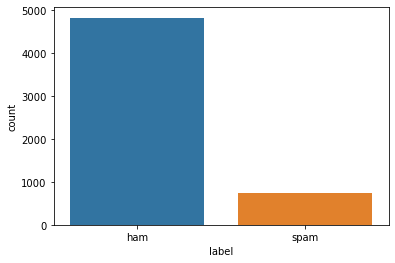

In [14]:
sns.countplot(df['label'])

In [19]:
df[df['message'] == np.nan].count()

label      0
message    0
dtype: int64

In [20]:
df[df['label'] == np.nan].count()

label      0
message    0
dtype: int64

# Checking frequency of words

In [83]:
main_str=""
for i in df['message']:
    main_str+=i
    
main_str_list = main_str.split()

In [84]:
repetition_of_words = dict(Counter(main_str_list))

In [85]:
repetition_of_words = pd.DataFrame.from_dict(repetition_of_words, orient = 'index', columns=['count'])

In [86]:
repetition_of_words['words'] = repetition_of_words.index

In [87]:
repetition_of_words.sort_values(by=['count'], ascending = False, inplace = True)

In [88]:
repetition_of_words.set_index(np.arange(len(repetition_of_words.index)), inplace = True)

In [93]:
repetition_of_words.head()

,count,words
0,2131,to
1,1594,you
2,1327,a
3,1196,the
4,1083,I


<AxesSubplot:xlabel='words', ylabel='count'>

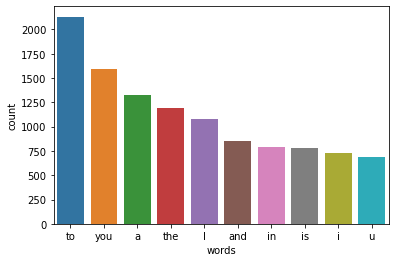

In [94]:
sns.barplot(x = repetition_of_words['words'].head(10), y = repetition_of_words['count'].head(10))

# Labeling the original data

In [95]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [96]:
df['label_tag'] = df['label'].apply([lambda x: 1 if x == 'ham' else 0])

In [97]:
df

,label,message,label_tag
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will �_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


# Building and Training the Model

In [98]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label_tag'], test_size = 0.25, random_state = 0)

In [100]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((1393,), (4179,), (1393,), (4179,))

In [104]:
lst = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= lst ,  
    lowercase=True,     
    stop_words='english' 
)
x_train_transformed = vectorizer.fit_transform(lst) 
x_test_transformed  = vectorizer.transform(x_test) 

In [106]:
classifier = MultinomialNB()
classifier.fit(x_train_transformed, y_train)

MultinomialNB()

# Checking the Accuracy of Model

In [108]:
print("Checking the accuracy of classifier {:.2f}%".format(classifier.score(x_test_transformed, y_test) * 100))

Checking the accuracy of classifier 96.63%


In [153]:
labels = classifier.predict(x_test_transformed)

In [154]:
real = y_test.tolist()
predicted_val = labels
results = confusion_matrix(real, predicted_val)
print('Confusion Matrix :')
print(results)

Confusion Matrix :
[[ 150   47]
 [   0 1196]]


In [ ]:
print ('Accuracy Score :',accuracy_score(real, predicted_val))


In [155]:
print ('Report : ')
print (classification_report(real, predicted_val))
score_2 = f1_score(real, predicted_val, average = 'binary')
print('F-Measure: %.3f' % score_2)

Report : 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       197
           1       0.96      1.00      0.98      1196

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393

F-Measure: 0.981


<AxesSubplot:>

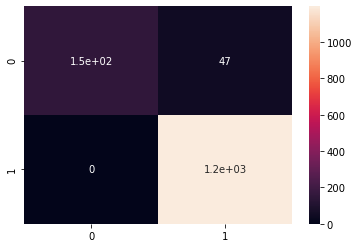

In [157]:
sns.heatmap(results, annot = True)